In [4]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [1]:

import pandas as pd
import numpy as np
from numpy import where
import csv

import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import cross_val_score


from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import plotly.offline as pyo
from collections import Counter


from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings(action='ignore')
from tabulate import tabulate

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier ,ExtraTreesClassifier
from xgboost import XGBClassifier,plot_tree
from lightgbm import LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier,Pool
import optuna
from optuna.integration import CatBoostPruningCallback
import xgboost as xgb

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [3]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss

In [4]:
from hyperopt import fmin, tpe, hp, rand, Trials, STATUS_OK

In [5]:
from IPython.display import Image

In [19]:
import time

from google.colab import files
uploaded = files.upload()

In [6]:
data = pd.read_csv('second.csv')
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,0,3,0,0,0,0,95,18,0,0,1,0,0,0,0,0,1
1,0,58,1,0,1,1,87,39,0,0,1,0,0,0,1,0,0
2,1,8,0,0,1,1,110,17,0,0,1,0,0,0,1,0,0
3,1,70,0,0,0,0,69,35,0,1,0,0,0,0,1,0,0
4,1,52,0,0,1,1,77,17,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34607,1,10,0,0,1,1,58,20,0,0,1,0,0,0,0,0,1
34608,1,56,0,0,1,1,213,55,0,1,0,0,1,0,0,0,0
34609,1,82,1,0,1,1,91,28,0,1,0,0,0,0,1,0,0
34610,0,40,0,0,1,1,99,33,0,0,1,0,0,0,1,0,0


## Train-Test Split

In [7]:
y = data['stroke']
X = data.drop('stroke', axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [9]:
y_test

17561    0
30884    0
251      0
30728    0
22327    0
        ..
22524    0
5511     0
26349    0
1266     0
33675    0
Name: stroke, Length: 6923, dtype: int64

**Random_state** – это параметр, который позволяет установить начальные условия для генерации случайных чисел. Он используется для получения повторяемых результатов в тех случаях, когда необходимо произвести несколько экспериментов с одним и тем же набором данных. При этом может быть установлено любое исходное значение для данного параметра.

Суть параметра **random_state** (во всех функциях и методах из SciKit-Learn) в воспроизводимых случайных значениях. Т.е. если явно задать значение random_state отличным от None - то генерируемые псевдослучайные величины будут иметь одни и те же значения при каждом вызове.

In [10]:
X_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,formerly smoked,never smoked,smokes,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
21578,0,50,0,1,1,1,79,22,0,0,1,0,0,0,1,0
30719,0,26,0,0,0,0,71,25,0,0,1,0,0,1,0,0
31532,1,81,0,0,1,1,105,47,1,0,0,0,0,1,0,0
8220,1,73,0,0,0,0,118,22,0,0,1,0,0,0,1,0
4459,1,31,0,0,1,1,77,24,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0,64,1,0,1,1,85,35,0,1,0,0,0,1,0,0
6265,1,38,0,0,0,0,147,27,0,1,0,1,0,0,0,0
11284,1,31,0,0,1,1,71,63,0,1,0,0,0,1,0,0
860,0,44,0,0,0,0,87,26,0,1,0,1,0,0,0,0


In [11]:
#counter = y_train.value_counts()
#counter
# summarize class distribution
cou = Counter(y_train)
cou

Counter({0: 27187, 1: 502})

## Feature Scaling

возможно, потребуется масштабировать(стандартизация или нормализация) перед использованием в методах машинного обучения,особенно для  таких как линейная регрессия, логистическая регрессия, нейронные сети, которые используют градиентный спуск в качестве стратегии оптимизации.
Изменение масштаба данных может осуществляться двумя способами: стандартизацией и нормализацией.
Техника масштабирования**: нормализац**ия изменяет масштаб данных так, чтобы данные находились в диапазоне от 0 до 1 (масштабирование Min-Max
).
Набор данных масштабируется посредств**ом стандартиза**ции, имеет среднее значение = 0 и стандартное отклонение = 1.                            std_per_feature =X_train.std()
print(std_per_feature)


***Масштабирование или стандартизация данных***. Это этап предварительной обработки данных, который применяется к независимым переменным или функциям данных. Это в основном помогает нормализовать данные в определенном диапазоне. Иногда это также помогает ускорить вычисления в алгоритме.
Каждый метод масштабирования имеет свои преимущества и ограничения, и не существует метода, подходящего для любой ситуации. Нам следует понять каждый метод, реализовать его и посмотреть, какой из них лучше всего подходит для конкретной проблемы.

***StandardScaler()*** преобразует данные таким образом, что их распределение будет иметь среднее значение 0 и стандартное отклонение 1. Это делается путем вычитания среднего значения каждого признака и деления на его стандартное отклонение.

Применение StandardScaler() помогает алгоритмам машинного обучения работать лучше, особенно если у признаков разные диапазоны значений. Масштабирование признаков позволяет моделям лучше справляться с данными, так как оно делает их более сопоставимыми и улучшает сходимость алгоритмов.

In [12]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)



In [13]:
#X_train_sc

In [14]:
#X_test_sc

In [15]:
#std_per_feature = X_train_sc.std()
#print(std_per_feature)

In [16]:
mean_per_feature = X_train_sc.mean()
print(mean_per_feature)

-1.1627891117096877e-18


In [17]:
print(len(X_train_sc))
print(len(X_test_sc))

27689
6923


# Handling Imbalance data using SMOTE

In [18]:

print("Before Smote, counts of label '1': {}".format(sum(y_train==1)))
print("Before Smote, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42)
#Функция ravel() в библиотеке NumPy используется для преобразования многомерного массива в одномерный массив.
#Она возвращает новый одномерный массив, содержащий те же элементы, что и исходный массив, но расположенные в одномерной последовательности.
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel()) # Skailing (здесь мы применяем масштабированные данные)

print('After Smote, the shape of train_X: {}'.format(X_train_smote.shape))
print('After Smote, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After Smote, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After Smote, counts of label '0': {}".format(sum(y_train_smote==0)))

Before Smote, counts of label '1': 502
Before Smote, counts of label '0': 27187 

After Smote, the shape of train_X: (54374, 16)
After Smote, the shape of train_y: (54374,) 

After Smote, counts of label '1': 27187
After Smote, counts of label '0': 27187


## Ансамблевые методы в машинном обучении - это методы, которые объединяют несколько моделей для решения задачи. Они строят не одну, а несколько моделей и объединяют их результаты для получения более точных и стабильных предсказаний или классификаций.

Методы бэггинга (bagging) используют множество случайных подмножеств обучающих данных для обучения разных моделей и затем усредняют их предсказания.

1. **Random Forest** - это метод бэггинга (bagging), который основан на использовании ансамбля решающих деревьев. При Random Forest создается множество решающих деревьев, каждое из которых обучается на случайном подмножестве данных и признаков, после чего результаты этих деревьев усредняются для получения окончательного предсказания.

Благодаря случайному выбору подмножества данных и признаков при построении каждого дерева, Random Forest обеспечивает разнообразие моделей и уменьшает переобучение, делая его эффективным методом для работы с широким спектром задач обучения с учителем.

2. **Bagged Decision Trees:** Это базовый метод бэггинга, где используются решающие деревья. Каждое дерево обучается на различном подмножестве данных (путем выбора с повторениями) и затем усредняет свои предсказания.

3. **Bagged SVM** (Support Vector Machines): Использование бэггинга с SVM. Каждая модель SVM обучается на случайном подмножестве данных, после чего их результаты усредняются.

4. **Bagged Neural Networks:** Бэггинг применительно к нейронным сетям. Каждая нейронная сеть обучается на своем подмножестве данных, а затем их результаты комбинируются.

5. **Bagged k-Nearest Neighbors (k-NN):** Применение бэггинга к методу k-NN. Каждая модель k-NN обучается на случайном подмножестве данных и затем их предсказания объединяются.

Бустинг (boosting) строит последовательность моделей, каждая из которых исправляет ошибки предыдущей, улучшая общую производительность.
1. **CatBoost:** Это градиентный бустинговый алгоритм, специально оптимизированный для работы с категориальными признаками. Он автоматически обрабатывает категориальные данные и может достигать высокой производительности без особых предварительных настроек.

2. **XGBoost:** Экстремальный градиентный бустинг (XGBoost) — это алгоритм градиентного бустинга, который обладает высокой производительностью и эффективностью. Он часто используется в соревнованиях по машинному обучению и широко применяется в практике из-за своей точности.

3. **AdaBoost:** Этот метод использует адаптивное взвешивание (Adaptive Boosting) для обучения последовательности слабых моделей (например, деревьев решений) с фокусом на улучшении ошибок предыдущих моделей.

4. **Gradient Boosting Machines (GBM):** Это общее название для алгоритмов, которые пошагово строят ансамбль слабых моделей (обычно деревьев решений) и корректируют их ошибки, фокусируясь на тех примерах, на которых предыдущие модели ошиблись.

5. **LightGBM:** Это еще один градиентный бустинговый алгоритм, который обеспечивает высокую скорость работы за счет оптимизации структуры деревьев и эффективной обработки больших объемов данных.
назаний.еревьям.

# SMOTE

## 1.BOOSTING

### КРОСС-ВАЛИДАЦИЯ

In [39]:

list_of_models = [
        CatBoostClassifier(),#boosting
        AdaBoostClassifier(),#boosting
        XGBClassifier(),#boosting
        LGBMClassifier(),#boosting
        GradientBoostingClassifier()] #boosting

#Эта строка создает список имен моделей в list_of_models.
#Для каждой модели x в list_of_models она использует функцию type(x).__name__, которая возвращает строковое имя класса объекта.
#Например, если модель - CatBoostClassifier(), type(x).__name__ вернет строку 'CatBoostClassifier'.
list_of_model_names = [type(x).__name__ for x in list_of_models]

cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1'])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_smote,
        y=y_train_smote,
        scoring=scoring,
        cv=10,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
CatBoostClassifier,42.997393,0.042300,0.989132,0.990593,0.989132,0.989051
AdaBoostClassifier,3.025200,0.037121,0.818921,0.823043,0.818921,0.818347
XGBClassifier,0.885185,0.016600,0.979605,0.981081,0.979605,0.979527
LGBMClassifier,1.314799,0.016800,0.986244,0.987791,0.986244,0.986158
GradientBoostingClassifier,13.657999,0.013300,0.921581,0.923046,0.921581,0.921508


**fit_time** и **score_time** отражают время, затраченное на обучение модели и время, затраченное на оценку каждой модели на каждой итерации кросс-валидации соответственно.

### Прогнозирование с CatBoostClassifier

**Параметры по умолчанию**

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Fit Time: 6.4186413288 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6787
           1       0.00      0.00      0.00       136

    accuracy                           0.98      6923
   macro avg       0.49      0.50      0.50      6923
weighted avg       0.96      0.98      0.97      6923

Confusion Matrix:
[[6787    0]
 [ 136    0]]


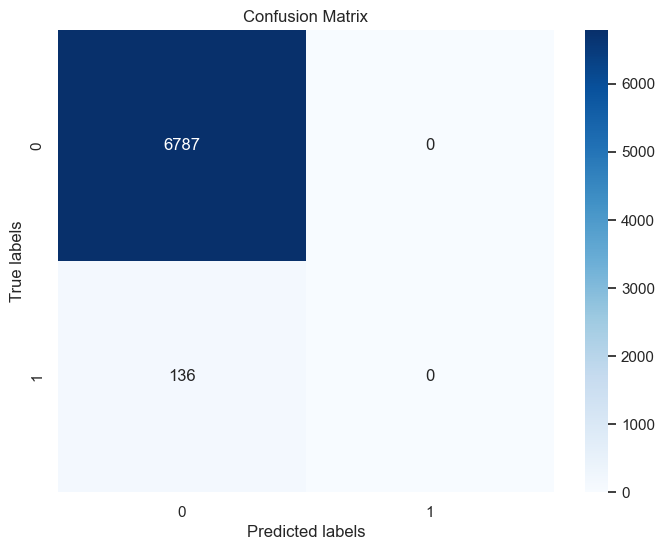

In [20]:
# Start measuring time
start_time = time.time()

# Обучение модели ансамбля
cat_model = CatBoostClassifier(verbose=False,random_state=55).fit(X_train_smote, y_train_smote,plot=True)

# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


# Предсказание на тестовой выборке
y_pred = cat_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Прогнозирование с LGBMClassifier

Fit Time: 0.2075300217 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6787
           1       0.00      0.00      0.00       136

    accuracy                           0.98      6923
   macro avg       0.49      0.50      0.50      6923
weighted avg       0.96      0.98      0.97      6923

Confusion Matrix:
[[6787    0]
 [ 136    0]]


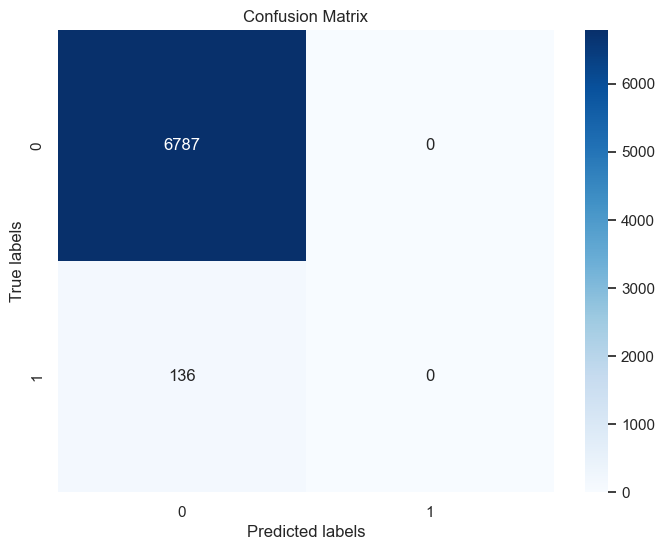

In [21]:
# Start measuring time
start_time = time.time()

# Обучение модели ансамбля
lgbm_model = LGBMClassifier(verbose=-1,random_state=33).fit(X_train_smote, y_train_smote)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


# Предсказание на тестовой выборке
y_pred = lgbm_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Прогнозирование XGBClassifier()

Fit Time: 0.1728 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.41      0.58      6787
           1       0.01      0.43      0.03       136

    accuracy                           0.41      6923
   macro avg       0.49      0.42      0.30      6923
weighted avg       0.95      0.41      0.57      6923

Confusion Matrix:
[[2795 3992]
 [  77   59]]


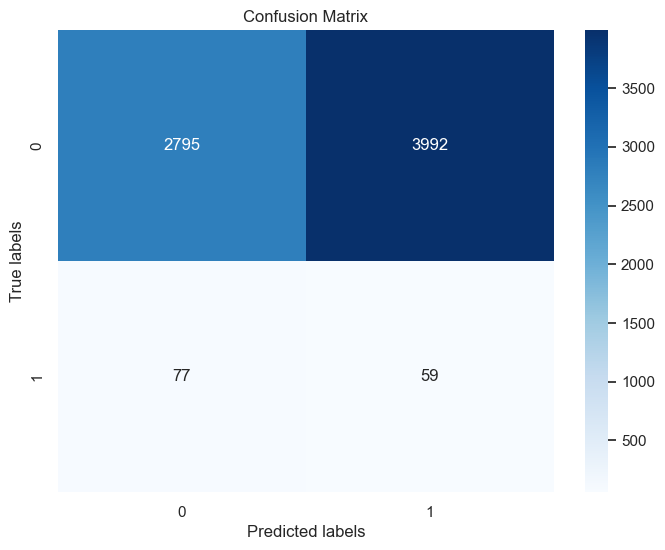

In [22]:
# Start measuring time
start_time = time.time()

# Обучение модели ансамбля
xgb_model = XGBClassifier(random_state=42).fit(X_train_smote, y_train_smote)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.4f} seconds")


# Предсказание на тестовой выборке
y_pred = xgb_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 2.Bagging

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [44]:
# List of base classifiers
base_classifiers = [
    RandomForestClassifier(),
    SVC(),   
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

# List of model names
list_of_model_names = [type(x).__name__ for x in base_classifiers]

# DataFrame to store results
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']
)

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Loop through each base classifier, perform cross-validation, and store results in the DataFrame
for model, model_name in zip(base_classifiers, list_of_model_names):
    bagging = BaggingClassifier(base_estimator=model)
    cv_result = cross_validate(
        estimator=bagging,
        X=X_train_smote,
        y=y_train_smote,
        scoring=scoring,
        cv=10,
        n_jobs=-1
    )

    cv_results.loc[model_name] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
RandomForestClassifier,72.974073,0.906001,0.968791,0.969362,0.968790,0.968781
SVC,344.796825,70.136698,0.861386,0.867458,0.861386,0.860813
DecisionTreeClassifier,3.676515,0.016195,0.984644,0.985649,0.984644,0.984598
KNeighborsClassifier,0.170701,25.024504,0.930813,0.936589,0.930812,0.930582


### Кросс Валидация

In [45]:
# List of base classifiers
base_classifiers = [
    #RandomForestClassifier(),
    #SVC(),
    ExtraTreesClassifier()
    #DecisionTreeClassifier(),
    #KNeighborsClassifier()
]

# List of model names
list_of_model_names = [type(x).__name__ for x in base_classifiers]

# DataFrame to store results
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']
)

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Loop through each base classifier, perform cross-validation, and store results in the DataFrame
for model, model_name in zip(base_classifiers, list_of_model_names):
    bagging = BaggingClassifier(base_estimator=model)
    cv_result = cross_validate(
        estimator=bagging,
        X=X_train_smote,
        y=y_train_smote,
        scoring=scoring,
        cv=5,
        n_jobs=-1
    )

    cv_results.loc[model_name] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
ExtraTreesClassifier,23.760596,1.959002,0.960808,0.961952,0.960808,0.960784


 ### Прогнозирование с DecisionTreeClassifier

Fit Time: 0.0787 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6787
           1       0.00      0.00      0.00       136

    accuracy                           0.98      6923
   macro avg       0.49      0.50      0.50      6923
weighted avg       0.96      0.98      0.97      6923

Confusion Matrix:
[[6787    0]
 [ 136    0]]


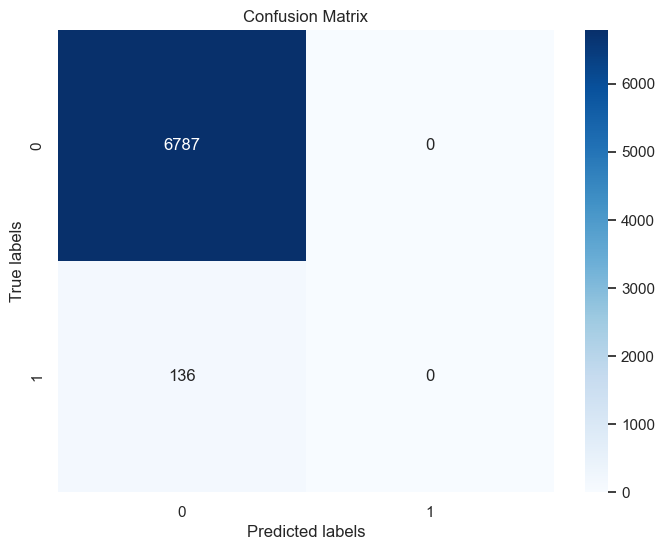

In [23]:
# Start measuring time
start_time = time.time()

# Обучение модели ансамбля
tree_model = DecisionTreeClassifier(random_state=55).fit(X_train_smote, y_train_smote)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.4f} seconds")


# Предсказание на тестовой выборке
y_pred = tree_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 3. STACKING  СТЕКИНГ

**Стекинг (stacking)** - это техника ансамблирования в машинном обучении, которая позволяет комбинировать прогнозы нескольких моделей, чтобы получить более качественные и стабильные предсказания. Она может быть использована как для задач классификации, так и для задач регрессии.

#### Принцип работы стекинга:

**Базовые модели:** Вначале выбираются несколько различных базовых моделей. Это могут быть модели разных алгоритмов, например, решающие деревья, случайные леса, градиентные бустинги, SVM и т. д. Каждая базовая модель обучается на одних и тех же обучающих данных.

**Мета-модель (Мета-классификатор):** После обучения базовых моделей создается мета-модель (или мета-классификатор). Эта модель обучается на предсказаниях базовых моделей вместо исходных признаков. В случае задачи классификации, мета-модель обучается на предсказанных вероятностях классов, а в случае регрессии - на предсказанных значениях целевой переменной.

**Прогноз на новых данных:** Когда необходимо сделать предсказание для новых данных, сначала базовые модели делают свои прогнозы. Затем мета-модель использует эти прогнозы базовых моделей как входные признаки и делает итоговое предсказани#е.

## Преимущества стекинга:

- **Увеличение качества:** Стекинг позволяет комбинировать сильные стороны разных моделей и уменьшать их слабые стороны, что может привести к более точным прогнозам.

- **Устойчивость к переобучению:** За счет комбинирования нескольких моделей, стекинг может быть менее склонен к переобучению, особенно если разные модели имеют разные виды ошибок.

- **Гибкость:** Стекинг позволяет использовать любые модели в качестве базовых, что делает его универсальным подходом для ансамблирования.

Однако стекинг требует более высокой вычислительной мощности и большего объема данных для эффективного обучения, поэтому он может быть не всегда применим в задачах с ограниченными ресурсами.

Стекинг - это мощный инструмент, который может помочь в повышении точности и стабильности моделей машинного обучения, особенно в соревнованиях по анализу данных и реальных задачах с высокими требованиями к качеству прогнозов.ству прогнозов.







### Стекинг моделей для улучшения классификации

Этот код создает ансамбль моделей и использует метод стекинга для объединения их прогнозов. В этом коде используются следующие шаги:

1. **Создание базовых моделей:** В этом шаге создаются пять различных классификационных моделей (GradientBoostingClassifier, AdaBoostClassifier, XGBClassifier, LGBMClassifier и CatBoostClassifier) с определенными гиперпараметрами. Каждая из этих моделей будет служить базовой моделью в ансамбле.

2. **Создание объекта EnsembleVoteClassifier:** В этом шаге создается объект EnsembleVoteClassifier, который объединяет базовые модели в ансамбль. Этот ансамбль будет использовать голосование для принятия решения. Модели передаются в ансамбль как параметр `clfs`.

3. **Обучение модели ансамбля:** В этом шаге ансамбль обучается на обучающих данных с использованием метода `.fit()`.

4. **Предсказание на тестовой выборке:** После обучения ансамбль используется для предсказания классов на тестовой выборке с использованием метода `.predict()`.

5. **Оценка результатов:** Затем выводится отчет по метрикам классификации (classification report), который включает в себя метрики, такие как точность, полнота, F1-мера и др. Также выводится матрица ошибок (confusion matrix) и строится тепловая карта для визуализации матрицы ошибок.

Этот код демонстрирует стекинг моделей, что может быть полезным для улучшения производительности классификации путем объединения прогнозов нескольких моделей. Вы можете изменить базовые модели, их гиперпараметры и количество базовых моделей, чтобы настроить ансамбль под конкретную задачу.

In [32]:
!pip install mlxtend

### STACKING 1

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6787
           1       0.12      0.01      0.03       136

    accuracy                           0.98      6923
   macro avg       0.55      0.51      0.51      6923
weighted avg       0.96      0.98      0.97      6923

Confusion Matrix:
[[6772   15]
 [ 134    2]]


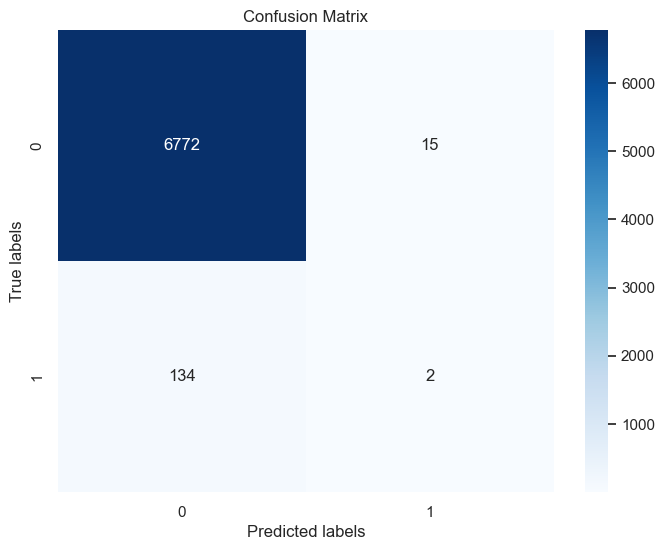

In [ ]:
 #Создание базовых моделей
model1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model2 = AdaBoostClassifier(n_estimators=100, random_state=42)
model3 = XGBClassifier(n_estimators=100, random_state=42)
model4 = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
model5 = CatBoostClassifier(iterations=100, random_state=42, verbose=False)

# Создание объекта EnsembleVoteClassifier
ensemble = EnsembleVoteClassifier(clfs=[model1, model2, model3, model4, model5])

# Обучение модели ансамбля
ensemble.fit(X_train_smote, y_train_smote)

# Предсказание на тестовой выборке
y_pred = ensemble.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [38]:
cou = Counter(y_test)
cou

Counter({0: 6787, 1: 136})

In [35]:
len(X_test_sc)

6923

In [36]:
len(y_test)

6923

**0 класс (не инсультники)**

Presision = 6772/6772+134 = TP/TP+FP = 0.98

Recall = 6772/6772+15=TP/TP+FN = 0.9979 ~1.00

**1 класс (инсультники)**

Presision = 2/2+15 = TP/TP+FP = 0.12

Recall = 2/2+134=TP/TP+FN = 0.01

### STACKING 2

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6787
           1       0.04      0.07      0.05       136

    accuracy                           0.95      6923
   macro avg       0.51      0.52      0.51      6923
weighted avg       0.96      0.95      0.95      6923

Confusion Matrix:
[[6538  249]
 [ 126   10]]


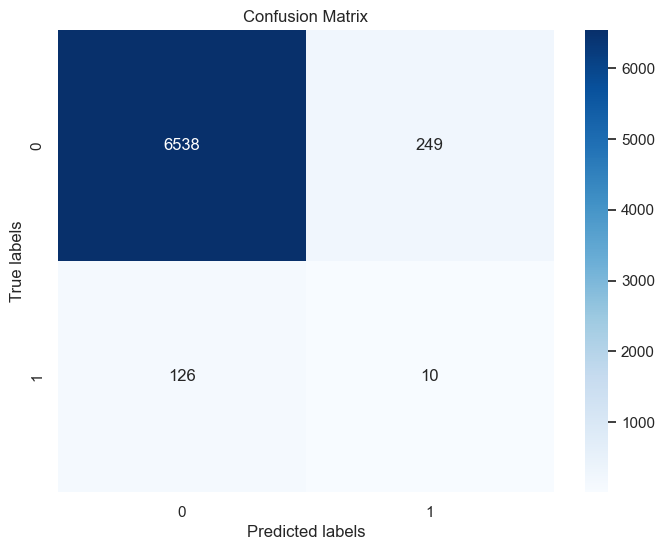

In [ ]:
# Create base models
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_2 = SVC()
model_3 = DecisionTreeClassifier()
model_4 = KNeighborsClassifier()

# Create an ensemble using VotingClassifier
ensemble = EnsembleVoteClassifier(clfs=[model_1,model_2,model_3,model_4],voting='hard')  # 'hard' voting combines predictions by majority voting

# Train the ensemble
ensemble.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = ensemble.predict(X_test_sc)

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**0 класс**

Presision = 6538/6538+126 = TP/TP+FP = 0.98

Recall = 6538/6538+249=TP/TP+FN = 0.96

**1 класс**

Presision = 10/10+249 = TP/TP+FP = 0.04

Recall = 10/10+126=TP/TP+FN = 0.07


**Macro Average (макро-среднее)**: Это среднее значение, которое вычисляется путем усреднения метрик (точность, полнота, F1-мера и т.д.), рассчитанных независимо для каждого класса, без учета дисбаланса классов. Каждый класс вносит равный вклад в итоговое среднее значение, независимо от количества его экземпляров (support).
**
Weighted Avera**ge (взвешенное среднее): Это среднее значение, рассчитанное путем усреднения метрик с учетом весов, которые определяются количеством экземпляров в каждом классе (support). Таким образом, классы с большим количеством экземпляров имеют более значимое влияние на итоговую метрику, чем классы с меньшим числом экземпляров. Это позволяет лучше учесть дисбаланс классов при оценке производительности модели по нескольким класса


**Macro Average (макро-среднее):**

Precision (точность): 0.51  
Recall (полнота): 0.52  
F1-score: 0.51  

Это означает, что если взять среднее значение precision, recall и F1-score по всем классам (вне зависимости от их размера или поддержки), то они будут равны указанным числам (в данном случае, около 0.51-0.52

**Улучшение Macro Average:** Это важно, если вам нужно, чтобы модель хорошо работала на обоих классах, независимо от их размера. Это может быть особенно важно в случаях, когда миноритарный класс имеет большое значение, например, при обнаружении редких болезней.

**Weighted Average (взвешенное среднее):**

Precision (точность): 0.96  
Recall (полнота): 0.95  
F1-score: 0.95  

Эти значения представляют взвешенное среднее, где каждый класс вносит вклад в соответствии с его размером (количеством экземпляров). Это означает, что модель имеет очень высокие показатели точности, полноты и F1-меры для средневзвешенных результатов.

**Улучшение Weighted Average**: Если ваша основная цель - общая точность прогнозов, и вы хотите, чтобы метрики отражали вклад каждого класса в соответствии с их пропорцией в данных.

Итак, модель имеет относительно низкие значения макро-среднего (учитывая все классы равноправно) и высокие значения взвешенного среднего (учитывая размеры классов) по precision, recall и F1-score на данном наборе данных.м.